In [36]:
import pandas as pd
# Load the dataset
df = pd.read_csv('C:/Users/dnyan/FODS Assignments/Datasets/Air_Quality.csv')
data = df.iloc[:, 4]
print(data.head())

0    ppb
1    ppb
2    ppb
3    ppb
4    ppb
Name: Measure Info, dtype: object


In [37]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [5]:
#Step 1: Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64


In [8]:
dataset_null = df.isnull()
print(dataset_null)  

       Unique ID  Indicator ID   Name  Measure  Measure Info  Geo Type Name  \
0          False         False  False    False         False          False   
1          False         False  False    False         False          False   
2          False         False  False    False         False          False   
3          False         False  False    False         False          False   
4          False         False  False    False         False          False   
...          ...           ...    ...      ...           ...            ...   
16213      False         False  False    False         False          False   
16214      False         False  False    False         False          False   
16215      False         False  False    False         False          False   
16216      False         False  False    False         False          False   
16217      False         False  False    False         False          False   

       Geo Join ID  Geo Place Name  Time Period  St

In [9]:
#Message column have almost 100% missing vlaue so we can drop it
df = df.drop('Message', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.4+ MB


In [12]:
#converting Data into Numerical Format
# Convert 'Start_Date' to datetime format
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

# For categorical columns, apply one-hot encoding
categorical_columns = ['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name', 'Time Period']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the first few rows of the transformed DataFrame
print(df_encoded.head())

# Optionally, check the data types after conversion
print(df_encoded.dtypes)


   Unique ID  Indicator ID  Geo Join ID Start_Date  Data Value  \
0     172653           375          203 2010-12-01       25.30   
1     172585           375          203 2008-12-01       26.93   
2     336637           375          204 2015-01-01       19.09   
3     336622           375          103 2015-01-01       19.76   
4     172582           375          104 2008-12-01       22.83   

   Name_Annual vehicle miles travelled (cars)  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   Name_Annual vehicle miles travelled (trucks)  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

 

In [20]:
# Check for duplicates again
duplicates = df_encoded.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [21]:
# Check for missing values again
missing_values = df_encoded.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [22]:
# Ensure all columns are in the correct data types
print("\nData types of columns:")
print(df_encoded.dtypes)


Data types of columns:
Unique ID                              int64
Indicator ID                           int64
Geo Join ID                            int64
Start_Date                    datetime64[ns]
Data Value                           float64
                                   ...      
Time Period_Winter 2016-17              bool
Time Period_Winter 2017-18              bool
Time Period_Winter 2018-19              bool
Time Period_Winter 2019-20              bool
Time Period_Winter 2020-21              bool
Length: 202, dtype: object


In [24]:
# Outlier detection (example using Z-score)
from scipy import stats

# You can choose to check for outliers in 'Data Value'
z_scores = stats.zscore(df_encoded['Data Value'])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).sum()  # threshold can be adjusted

print(f"Number of outliers in 'Data Value': {outliers}")

# Optionally, you can remove outliers
df_encoded = df_encoded[(abs_z_scores <= 3)]
print(f"New shape after removing outliers: {df_encoded.shape}")

Number of outliers in 'Data Value': 274
New shape after removing outliers: (15944, 202)


In [25]:
#Re-verify after handling the missing values
# Check for missing values
missing_values = df_encoded.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Summary statistics
print("Summary statistics of the DataFrame:")
print(df_encoded.describe())


Missing values in each column:
Series([], dtype: int64)
Summary statistics of the DataFrame:
           Unique ID  Indicator ID   Geo Join ID  \
count   15944.000000  15944.000000  1.594400e+04   
mean   373678.183705    423.956222  6.201849e+05   
min    121644.000000    365.000000  1.000000e+00   
25%    173633.750000    365.000000  2.020000e+02   
50%    325285.500000    375.000000  3.030000e+02   
75%    605287.250000    386.000000  4.040000e+02   
max    799868.000000    661.000000  1.051061e+08   
std    215387.957752    107.881226  7.960520e+06   

                          Start_Date    Data Value  
count                          15944  15944.000000  
mean   2014-04-07 10:34:49.914701568     17.826834  
min              2005-01-01 00:00:00      0.000000  
25%              2011-01-01 00:00:00      8.980000  
50%              2014-06-01 00:00:00     14.820000  
75%              2017-06-01 00:00:00     25.570000  
max              2021-06-01 00:00:00     83.800000  
std           

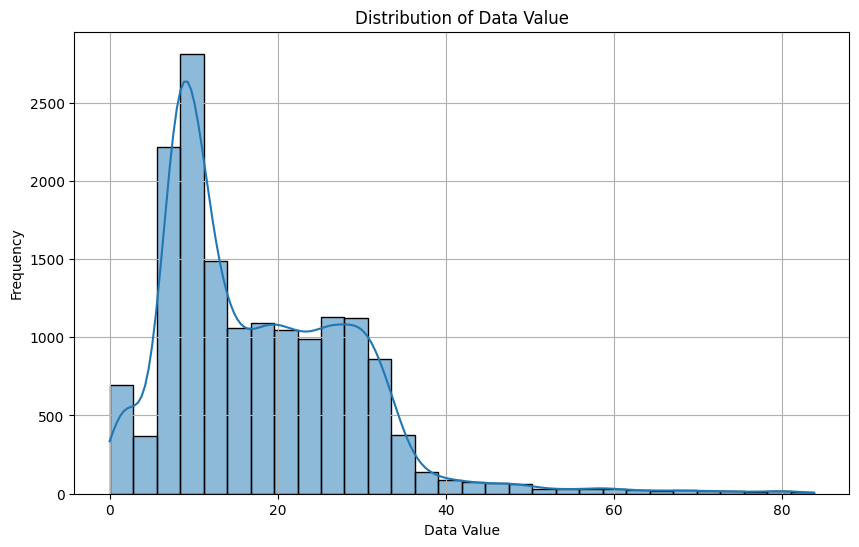

In [27]:
#now data is in good shape and clean so we can do data transformation 
#Distribution Plot of Data Value
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['Data Value'], bins=30, kde=True)
plt.title('Distribution of Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [31]:
#feature selection
# Drop irrelevant columns
# Assuming Unique ID, Indicator ID, and Geo Join ID are not directly relevant for your analysis
df_transformed = df_encoded.drop(['Unique ID', 'Indicator ID', 'Geo Join ID'], axis=1)

# Extracting year and month from Start_Date
df_transformed['Year'] = df_transformed['Start_Date'].dt.year
df_transformed['Month'] = df_transformed['Start_Date'].dt.month

# we can Drop Start_Date if it's not needed anymore
df_transformed = df_transformed.drop('Start_Date', axis=1)

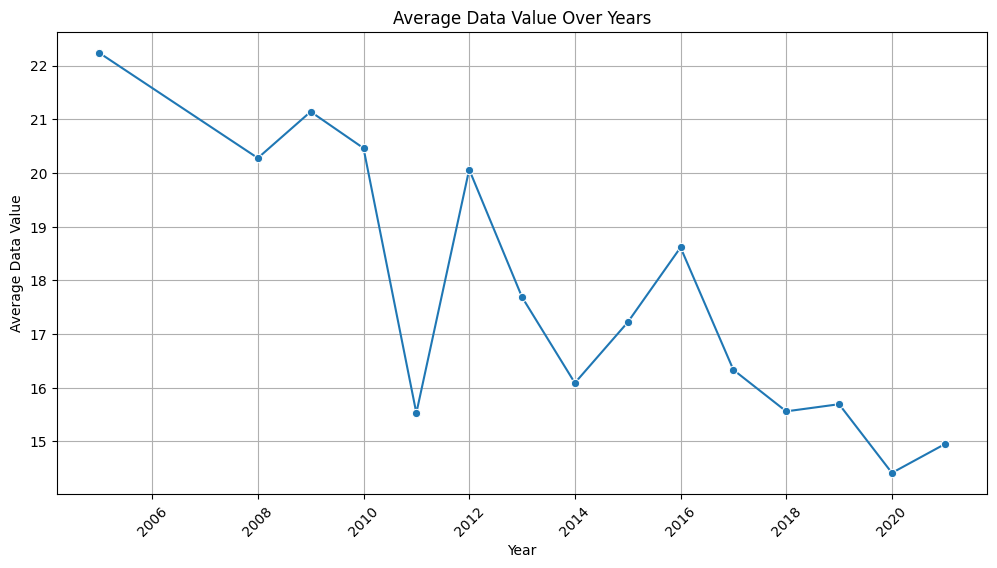

In [33]:
# Grouping by Year to find the average Data Value
average_data_value_per_year = df_transformed.groupby('Year')['Data Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_data_value_per_year, x='Year', y='Data Value', marker='o')
plt.title('Average Data Value Over Years')
plt.xlabel('Year')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45)
plt.grid()
plt.show()


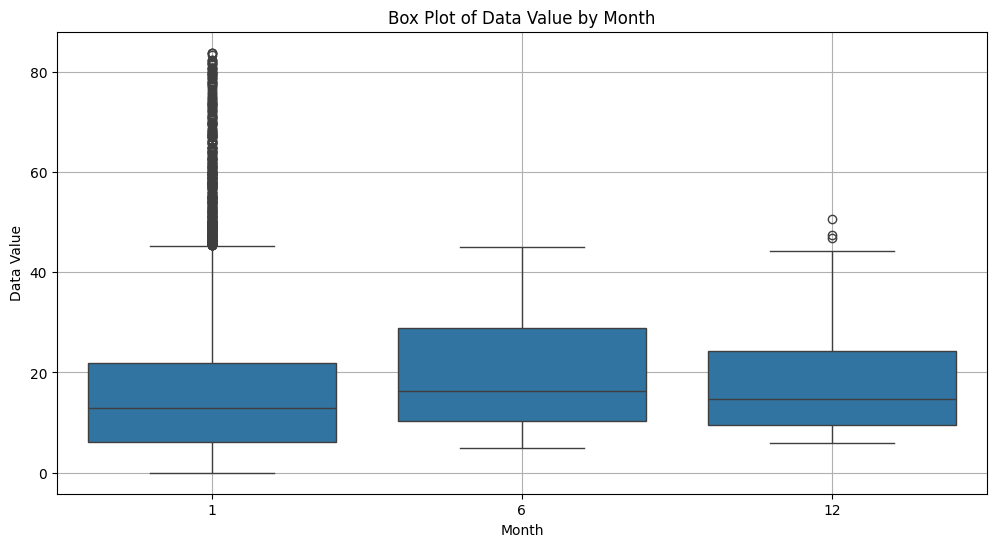

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Data Value', data=df_transformed)
plt.title('Box Plot of Data Value by Month')
plt.xlabel('Month')
plt.ylabel('Data Value')
plt.grid()
plt.show()